## Exploring the No-show Appointment Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Cleaning and Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

<a id='wrangling'></a>
## Data cleaning and wrangling

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the No show Appointment Dataset
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
#Checking the columns in the dataset
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The first thing i notice is the column names,

To-do: change thge column names to lower case, change '-' to '_'

In [4]:
#Changing the column names to lower case and replacing - with _

data.rename(columns = lambda x:x.strip().lower().replace('-','_'), inplace = True)

In [5]:
#changing the spelling of some column headers to aviod errors in the analysis

data.rename(columns ={'hipertension':'hypertension','handcap':'handicap'}, inplace = True)

In [6]:
data.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#Check the number of rows and columns in the dataset
data.shape

(110527, 14)

In [8]:
#Checking the distribution of the data
data.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
#For patientid we have to sure that the data doesnt contain different rows for the same patient

data['patientid'].nunique()

# The above line of code shows that there are patientid appearing more thn once so we have to remove duplicates

62299

In [10]:
#First lets check the amount of duplicated rows in the data set

len(data)-len(data.drop_duplicates())
data.duplicated().sum()

0

There are no duplicated rows in the dataset, But the max age in the dataset is 115 which appears to be an outlier considering the value of the 75 percentile being 55. and the data also has -1 and 0 as minimum age of which we have to take out as there is 0 or -1 age

Using the formula Q3 + 1.5IQR to take out outliers

In [11]:
data

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [12]:
data.query('age > 0',inplace=True)

In [13]:
data

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [14]:
data.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
#Taking out the outlier from the dataset

percentile_75 = data['age'].quantile(0.75)
percentile_25 = data['age'].quantile(0.25)

iqr = percentile_75 - percentile_25
iqr

outlier = percentile_75 + (1.5*iqr)
outlier

111.5

All ages greater than 111.5 would be considered as an outlier based on the calculation above.

In [16]:
#Removing the Outlier in the age column from the data set.

data.query('age < 111.5', inplace =True)

In [17]:
data.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.069820e+05,1.069820e+05,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000
mean,1.472801e+14,5.675434e+06,38.312501,0.101036,0.203773,0.074246,0.031407,0.022938,0.323269
std,2.558251e+14,7.133307e+04,22.460622,0.301377,0.402804,0.262172,0.174416,0.164010,0.467727
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173028e+12,5.640489e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.171698e+13,5.680742e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433627e+13,5.725635e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [18]:
data.shape

(106982, 14)

In [19]:
data.info()

#No null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       106982 non-null  float64
 1   appointmentid   106982 non-null  int64  
 2   gender          106982 non-null  object 
 3   scheduledday    106982 non-null  object 
 4   appointmentday  106982 non-null  object 
 5   age             106982 non-null  int64  
 6   neighbourhood   106982 non-null  object 
 7   scholarship     106982 non-null  int64  
 8   hypertension    106982 non-null  int64  
 9   diabetes        106982 non-null  int64  
 10  alcoholism      106982 non-null  int64  
 11  handicap        106982 non-null  int64  
 12  sms_received    106982 non-null  int64  
 13  no_show         106982 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.2+ MB


In [20]:
data.drop(['patientid','appointmentid'], axis = 1, inplace =True)

In [21]:
data.query('handicap < 2')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [22]:
data.shape

(106982, 12)

In [40]:
# converting the no_show column to integer i.e 0,1
data['no_show'].replace({'No':0,'Yes':1}, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

In [24]:
#Convert the scheduledday and appiontment day to date format

data['scheduledday'] = pd.to_datetime(data['scheduledday'])
data['appointmentday'] = pd.to_datetime(data['appointmentday'])

In [25]:
#Extracting the week days from the schedulweday and appointment day, it would extracted as int64.

data['week_day'] = data['scheduledday'].dt.weekday
data['week_day_2'] = data['appointmentday'].dt.weekday

#Getting the day name from the scheduled dayand appointment day
data['week_day_sch'] = data['scheduledday'].dt.day_name()
data['week_day_app'] = data['appointmentday'].dt.day_name()


In [26]:
data['isweekend_scheduled'] = data['week_day']>=5
data['isweekend_appointed'] = data['week_day_2']>=5

#Counting the amount patient who has their appointment on diiferent days
data['week_day_app'].value_counts()

Wednesday    25090
Tuesday      24831
Monday       21901
Friday       18464
Thursday     16657
Saturday        39
Name: week_day_app, dtype: int64

The number of patients whose appointment falls on a weekend is neglible compared to those whose appointment fall on a week day

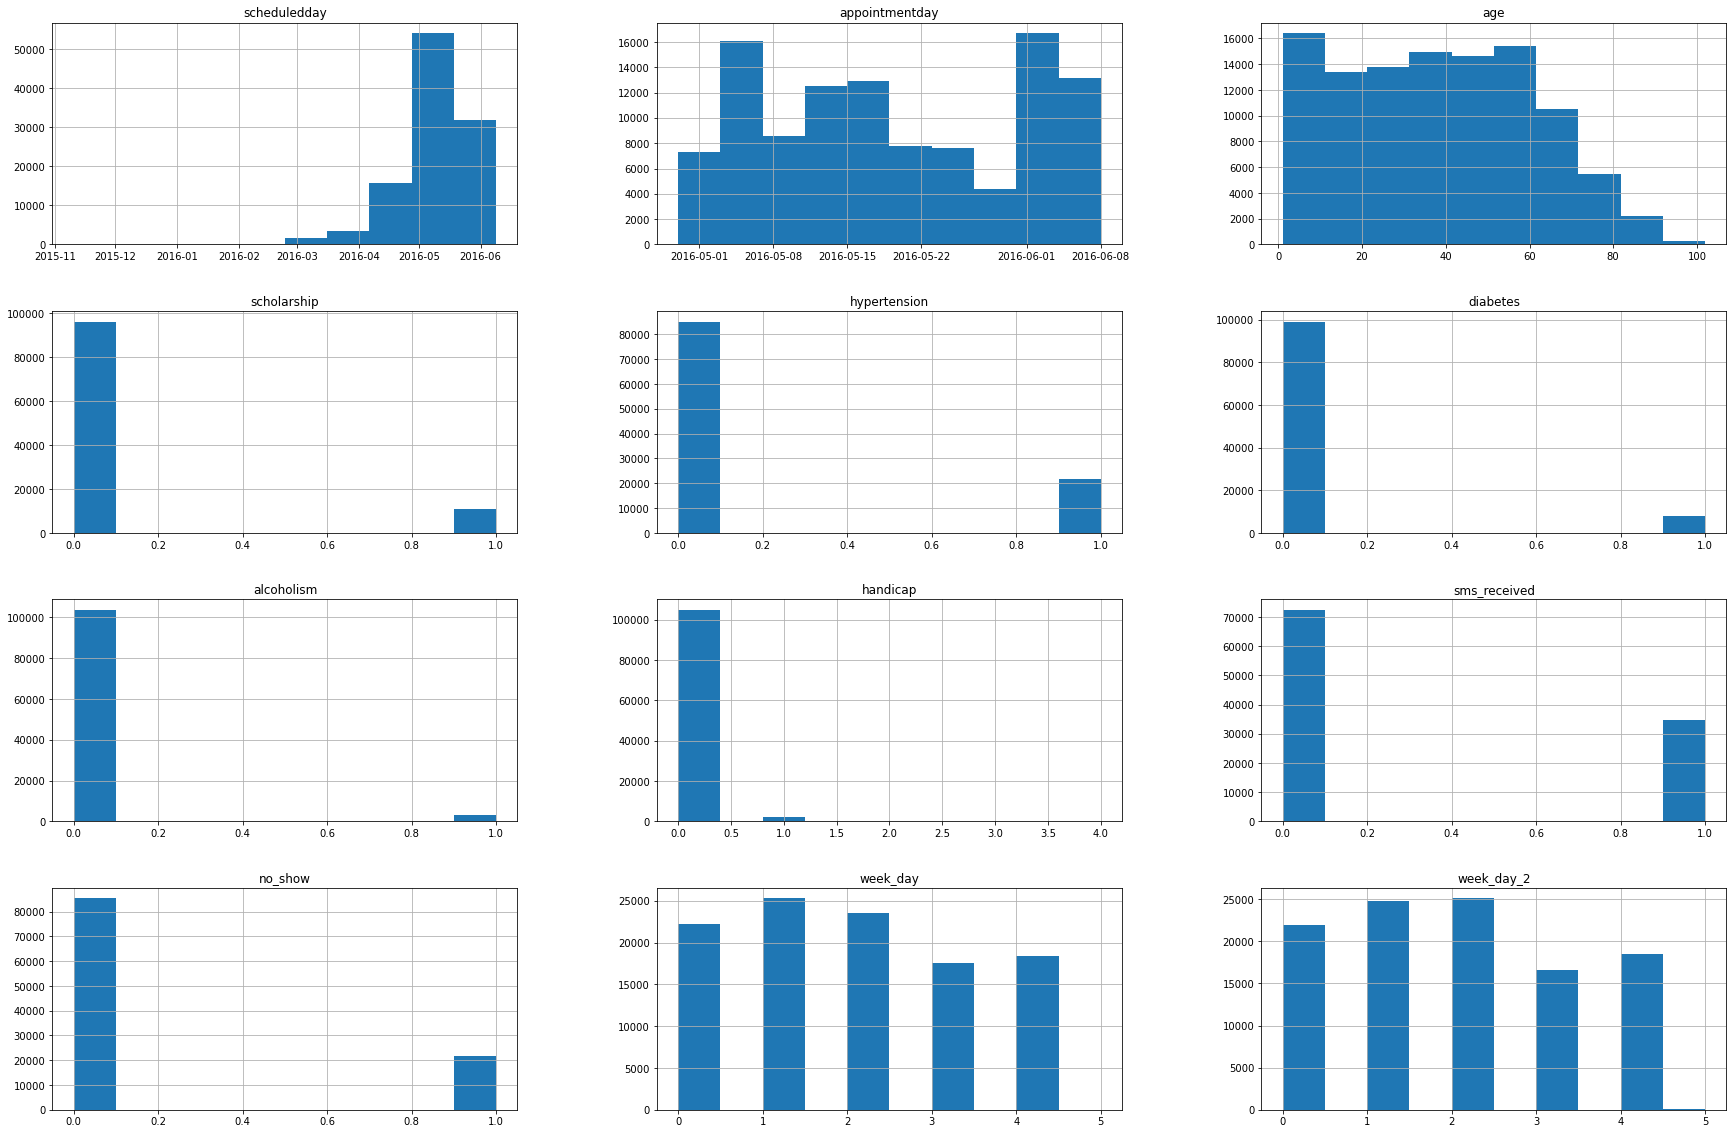

In [27]:
data.hist(figsize=(30,20));

The histograms above visualizes the dataset
    - Majority of the patients are within the ages of 0 - 70 (there are also a lot new borns in this dataset.

#### What is the percentage of the patients that have been diagnosed with each if thes ailments?
#### What is the percentage of the patients that received SMS or have scholarship?


The code below shows the percentage of the patients from the dataset that suffer from each of this ailments and percentage of patients that received sms or have a scholarship

In [28]:
def Check(arg):
    hcp = round(data[arg].value_counts(normalize=True)*100)
    if arg == 'sms_received':
        print('{}% of the patients received SMS'.format(hcp[1]))
    elif arg == 'handicap':
        print('{}% of the patients are not handicapped'.format(hcp[0]))
    elif arg == 'scholarship':
        print('{}% of the patients have schloarship'.format(hcp[1]))
    else:   
        print('{}% of the patients suffer from {}'.format(hcp[1],arg))
    
    
    
    

In [29]:
#Input the ailment you want to check, sms_received or scholarship

arg = input('Input the ailment or sms or scholarship:').lower()
Check(arg)

Input the ailment or sms or scholarship:Diabetes
7.0% of the patients suffer from diabetes


In [30]:
#Masking the dataset by the patients that show up for their appointments and those that didnt show up

show_up = data[data['no_show'] == 'No']
no_show_up = data[data['no_show'] =='Yes']

In [31]:
pd.DataFrame(data.groupby('no_show').mean()['age'])

,age
no_show,
0,39.073407
1,35.318125


The result above shows the average age of patients that either showed up for their appointment or nay.

- The average age of patients that showed up for their appointment is 39years
- The average age of patients that did not showed up for their appointment is 39years

#### Does appointments on weekends or weekdays determine whether patients show up or not?

Checking the number of patients that have their appointments on weekend or a weekday,  

Conclusion: Because the number of patient that are their appointment on weekend are negligible compareed to the patients that their appointments on the weekday, We cannot use the the factor to understand if booking the appointment days for weekend or weekday has an effect on the availablity of the patient.

In [32]:
pd.DataFrame(data.groupby('week_day_2')['no_show'].value_counts())

perc = pd.DataFrame(data.groupby('week_day_2')['no_show'].value_counts(normalize=True))
(round(perc*100))

no_show
week_day_2 no_show         
0          0           79.0
           1           21.0
1          0           80.0
           1           20.0
2          0           80.0
           1           20.0
3          0           81.0
           1           19.0
4          0           79.0
           1           21.0
5          0           77.0
           1           23.0

In [33]:
data['week_day_2'].corr(data['no_show'])

0.0020748421944480674

This shows the percentage of patients that showed up on the their respectibe appointment days, of all the days - albeit, no much diiference, Thursday recorded the highest percentage (81%) of patient showing up for their appointments and saturday recording the least (77%). 

Verdict: Seeing that the show up rate is not so far apart,coupled with the fact that the correlation between both variables(show_up and day of the week) is very small indicating a very weak correlation of 0.002

In [34]:
pd.DataFrame(data.groupby('scholarship')['no_show'].value_counts(normalize=True)) *100

no_show
scholarship no_show           
0           0        80.133717
            1        19.866283
1           0        76.214266
            1        23.785734

In [35]:
data['scholarship'].corr(data['no_show'])

0.029387172323085402

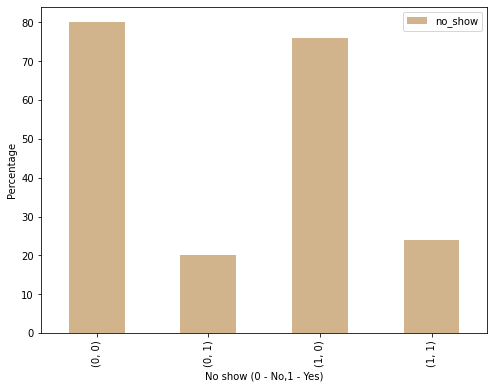

In [53]:
round(pd.DataFrame(data.groupby('scholarship')['no_show'].value_counts(normalize=True)) *100).plot(kind='bar',ylabel='Percentage',xlabel='No show (0 - No,1 - Yes)', figsize=(8,6), color ='tan');

The percentage of patients that have scholarships and did not show up for their appointment is 24% compared to the patients with scholarship and did show up which amounted 20% of patients in that list. This however shows that there is a correlation between patients with scholarship and whether or not the patient showed up. albeit, no strong.

In [37]:
round(pd.DataFrame(data.groupby('sms_received')['no_show'].value_counts(normalize=True)) *100)

no_show
sms_received no_show         
0            0           83.0
             1           17.0
1            0           72.0
             1           28.0

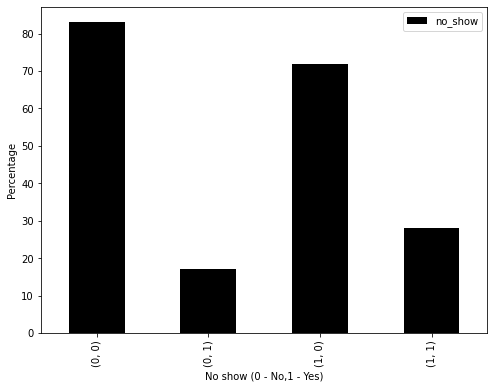

In [52]:
round(pd.DataFrame(data.groupby('sms_received')['no_show'].value_counts(normalize=True)) *100).plot(kind='bar',ylabel='Percentage',xlabel='No show (0 - No,1 - Yes)', figsize=(8,6), color ='black');

In [39]:
data['sms_received'].corr(data['no_show'])

0.12730520906182627

The percentage of patients that received an SMS and showed up for their appointment is 72%, although it appears that even the patients that didnt received SMS also had a high show up rate at 83%.

<a id='conclusions'></a>
## Conclusion

- A patient having a scholarship or not does not significantly determine whether the scholarship would show up for his/her appointment or not, it would be expected that patients would scholarship would take advantage and show up more, but from the dataset, that doesn't seem to be the case



- To improve patient show up rate, the clinic should see to it that the patients get an SMS notification of when they are supposed to have their appointment, this helps to register that appointmemt date in the minds of the patients, provided the read the SMS though.
